<a href="https://colab.research.google.com/github/RithvikAvula4010/MADE-FAU-Project-WS-2425/blob/main/project/Analysis_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
gen_data = pd.read_csv(r'/content/Electric_Generation_By_Fuel_Type__GWh__Beginning_1960.csv')
gen_data.head()

,Year,Coal,Natural Gas,Petroleum,Conv. Hydro,PS Hydro,Nuclear,Net Imports,Other,Waste,LFG,Wood,Wind,Solar,Total
0,1980,19643,10766,37834,26241,0,19276,5575.370,0.0,0.0,0.0,0.0,0.0,0.0,119335.370
1,1981,19632,11566,36760,25658,0,17444,7136.554,0.0,0.0,0.0,0.0,0.0,0.0,118196.554
2,1982,20807,13974,32932,25329,0,14438,10196.177,0.0,0.0,0.0,0.0,0.0,0.0,117676.177
3,1983,20753,12428,34380,26162,0,16376,11888.300,0.0,0.0,0.0,0.0,0.0,0.0,121987.300
4,1984,21902,15395,28891,26586,0,21187,10812.065,0.0,0.0,0.0,0.0,0.0,0.0,124773.065


In [12]:
Sales_data = pd.read_csv(r'/content/Electricity_Sales_By_Sector__GWh__Beginning_1980.csv')
Sales_data.head()

,Year,Residential,Commercial,Industrial,Transportation,Total
0,1980,30583,40471,32110,2146,105310
1,1981,30702,42685,32240,2059,107686
2,1982,30626,42800,30484,2069,105979
3,1983,31803,43850,31424,2422,109498
4,1984,32836,47600,28789,2685,111910


In [13]:
gen_data.fillna(0, inplace=True)
Sales_data.fillna(0, inplace=True)

In [14]:
merged_data = pd.merge(gen_data, Sales_data, on='Year')

In [15]:
correlation_matrix = merged_data.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                       Year    Coal    Natural Gas    Petroleum    \
Year              1.000000 -0.800339       0.918241    -0.880120   
Coal             -0.800339  1.000000      -0.708329     0.711339   
Natural Gas       0.918241 -0.708329       1.000000    -0.948347   
Petroleum        -0.880120  0.711339      -0.948347     1.000000   
Conv. Hydro       0.114461 -0.240387       0.050191    -0.192531   
PS Hydro          0.324919  0.083122       0.486298    -0.508231   
Nuclear           0.887526 -0.564733       0.831756    -0.797597   
Net Imports       0.782168 -0.775211       0.673759    -0.759643   
Other             0.871861 -0.721248       0.753219    -0.713921   
Waste             0.851751 -0.661547       0.716550    -0.673375   
LFG               0.895483 -0.886494       0.803136    -0.779319   
Wood              0.660260 -0.508921       0.622183    -0.587590   
Wind              0.853213 -0.968716       0.748360    -0.740742   
Solar             0.742436 

In [16]:
correlation = merged_data['Total  _x'].corr(merged_data['Total  _y'])
print(f"Correlation between Total Generation and Total Sales: {correlation}")

Correlation between Total Generation and Total Sales: 0.9733213686616367


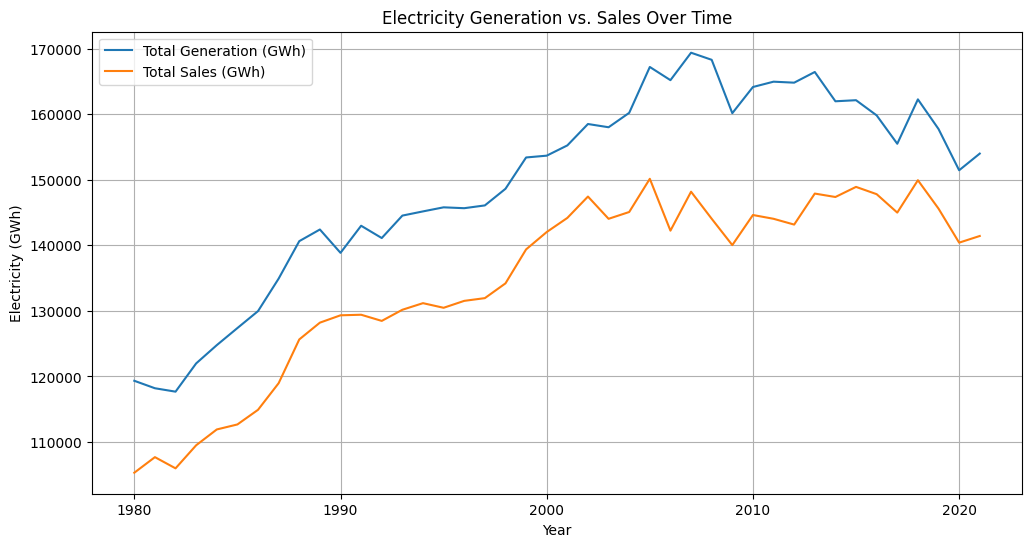

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Year'], merged_data['Total  _x'], label='Total Generation (GWh)')
plt.plot(merged_data['Year'], merged_data['Total  _y'], label='Total Sales (GWh)')
plt.xlabel('Year')
plt.ylabel('Electricity (GWh)')
plt.title('Electricity Generation vs. Sales Over Time')
plt.legend()
plt.grid()
plt.show()

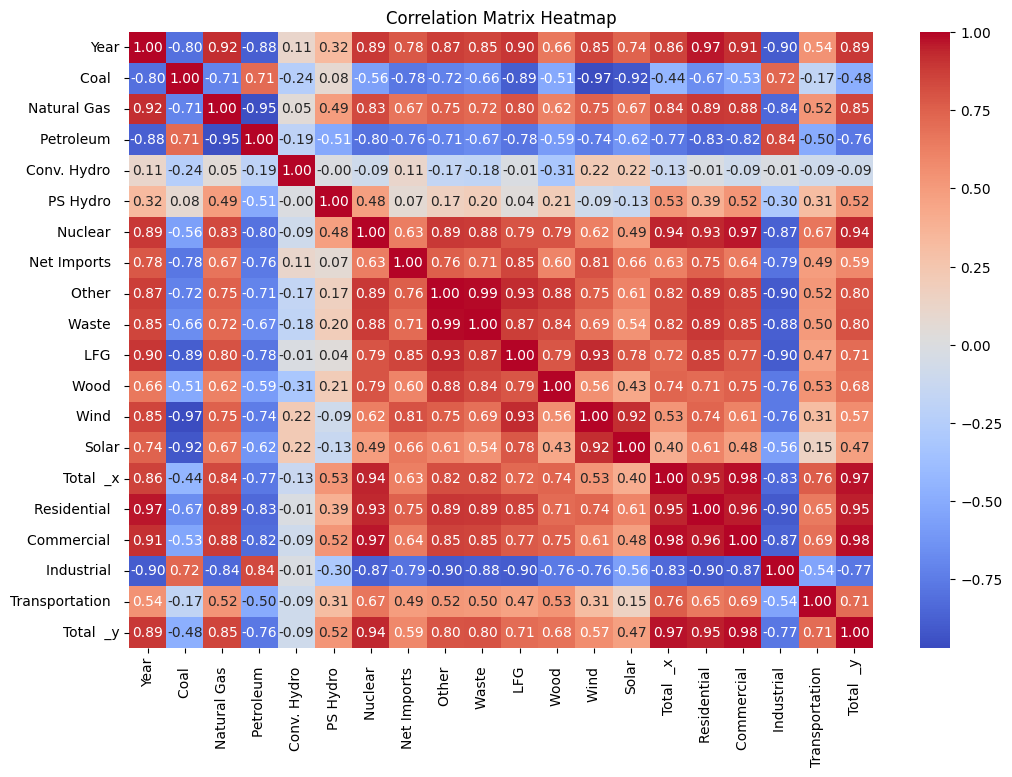

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [22]:
print(merged_data.columns)

Index(['Year', 'Coal  ', 'Natural Gas  ', 'Petroleum  ', 'Conv. Hydro  ',
       'PS Hydro  ', 'Nuclear  ', 'Net Imports  ', 'Other  ', 'Waste  ',
       'LFG  ', 'Wood  ', 'Wind  ', 'Solar', 'Total  _x', 'Residential  ',
       'Commercial  ', 'Industrial  ', 'Transportation  ', 'Total  _y'],
      dtype='object')


In [23]:
fuel_types = ['Coal  ', 'Natural Gas  ', 'Petroleum  ', 'Wind', 'Solar']
sectors = ['Residential  ', 'Commercial  ', 'Industrial  ', 'Transportation  ']

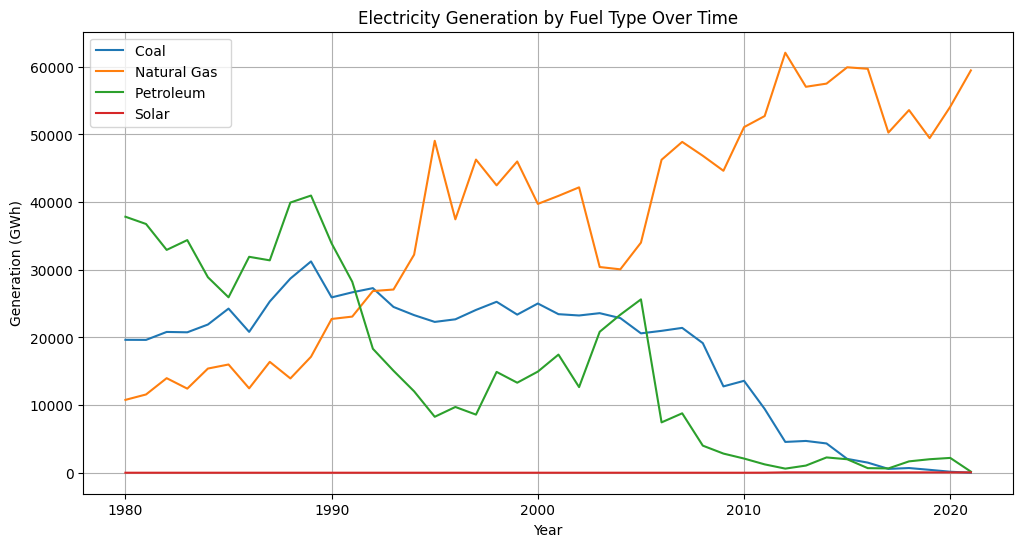

In [24]:
plt.figure(figsize=(12, 6))
for fuel in fuel_types:
    if fuel in merged_data.columns:
        plt.plot(merged_data['Year'], merged_data[fuel], label=fuel)
    else:
        print(f"Warning: {fuel} not found in generation data.")
plt.xlabel('Year')
plt.ylabel('Generation (GWh)')
plt.title('Electricity Generation by Fuel Type Over Time')
plt.legend()
plt.grid()
plt.show()

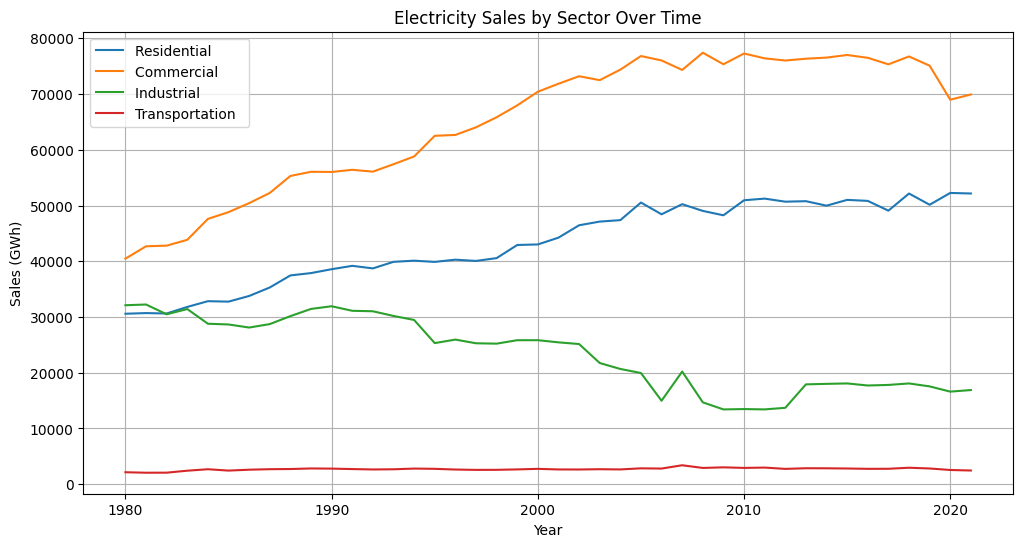

In [25]:
plt.figure(figsize=(12, 6))
for sector in sectors:
    if sector in merged_data.columns:
        plt.plot(merged_data['Year'], merged_data[sector], label=sector)
    else:
        print(f"Warning: {sector} not found in sales data.")
plt.xlabel('Year')
plt.ylabel('Sales (GWh)')
plt.title('Electricity Sales by Sector Over Time')
plt.legend()
plt.grid()
plt.show()

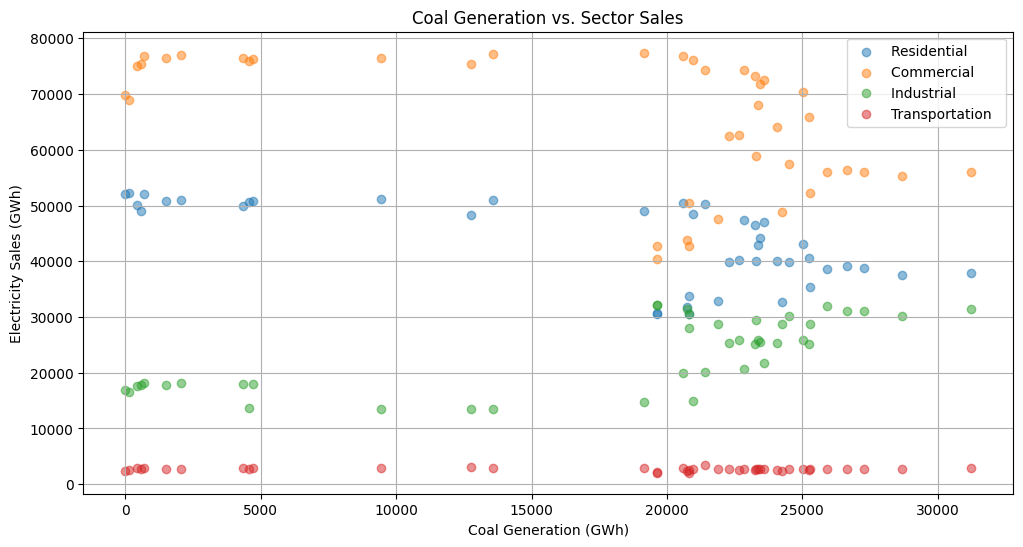

In [27]:
plt.figure(figsize=(12, 6))
for sector in sectors:
    if 'Coal  ' in merged_data.columns and sector in merged_data.columns:
        plt.scatter(merged_data['Coal  '], merged_data[sector], alpha=0.5, label=sector)
    else:
        print(f"Warning: 'Coal  ' or {sector} column not found in merged data.")
plt.xlabel('Coal Generation (GWh)')
plt.ylabel('Electricity Sales (GWh)')
plt.title('Coal Generation vs. Sector Sales')
plt.legend()
plt.grid()
plt.show()

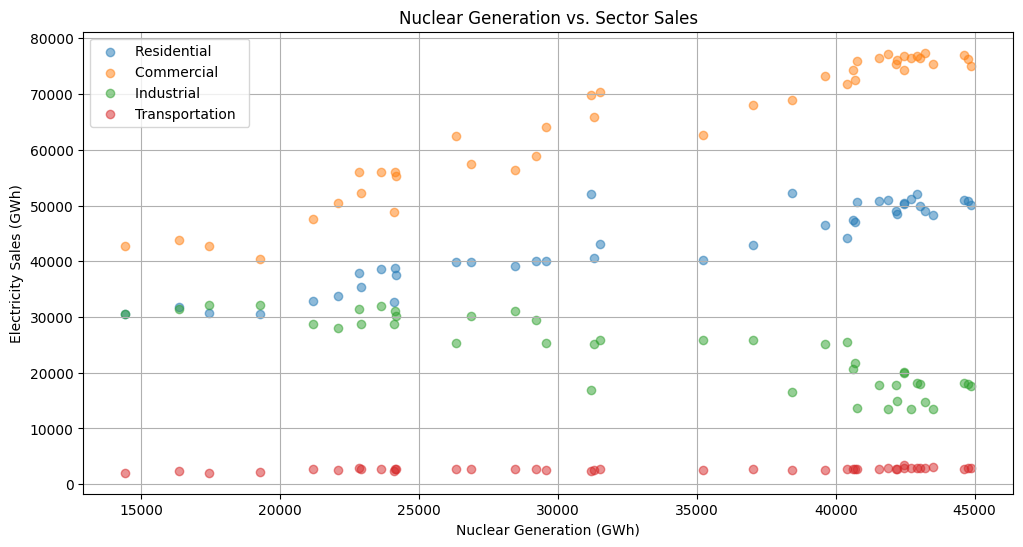

In [29]:
plt.figure(figsize=(12, 6))
for sector in sectors:
    if 'Nuclear  ' in merged_data.columns and sector in merged_data.columns:
        plt.scatter(merged_data['Nuclear  '], merged_data[sector], alpha=0.5, label=sector)
    else:
        print(f"Warning: 'Nuclear  ' or {sector} column not found in merged data.")
plt.xlabel('Nuclear Generation (GWh)')
plt.ylabel('Electricity Sales (GWh)')
plt.title('Nuclear Generation vs. Sector Sales')
plt.legend()
plt.grid()
plt.show()